In [1]:
import numpy as np
import math
from Crypto.Util.number import getPrime, inverse, bytes_to_long, long_to_bytes
import random


In [2]:
def gcd(a, b):
    if b == 0:
        return a
    else:
        return gcd(b, a%b)
def modinv(x, p):
    gcd, u, v = egcd(x, p)
    return u%p
def egcd(a, b):
    if a == 0:
        return (b, 0, 1)
    else:
        gcd, x, y = egcd(b%a, a) #compute gcd first
        return (gcd, y - b//a *x , x)
    

# Discrete Log problem

One way trapdoor function
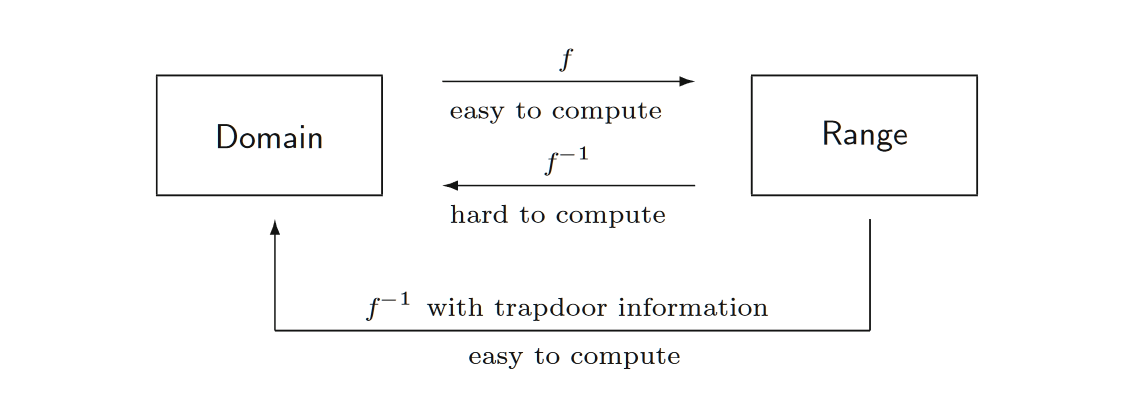

**Definition**  
Let $g$ be a **primitive root** for $\mathbb{F}_{p}$ and let $h$ be a nonzero element of $\left.\mathbb{F}_{p} . \text { The } \text {Discrete Logarithm Problem (DLP}\right)$ is the problem of finding an exponent $x$ such that  
$
g^{x} \equiv h \quad(\bmod p)
$

*Infinite solutions* : $g^{x+k(p-1)}=g^{x} \cdot\left(g^{p-1}\right)^{k} \equiv h \cdot 1^{k} \equiv h \quad(\bmod p)$

*Definition:*  
$\log _{g}: \mathbb{F}_{p}^{*} \longrightarrow \frac{\mathbb{Z}}{(p-1) \mathbb{Z}}$  
is also an isomorphism

*Propriety*:  
$\log _{g}(a b)=\log _{g}(a)+\log _{g}(b) \quad \text { for all } a, b \in \mathbb{F}_{p}^{*}$

# Diffie Hellman algo

* Parameter creation:  
Choose large prime $p$
Choose $g$ with large prime order

* Private computations:  
$\underbrace{A \equiv g^{a}(\bmod p)}_{\text {Alice computes this }} \quad \text { and } \quad \underbrace{B \equiv g^{b}(\bmod p)}_{\text {Bob computes this }}$

* Exchange:
Exchange A and B

* Shared secret:
Compute the number $B^{a}(\bmod$
$p) . \quad$ Compute the number $A^{b}(\bmod p)$  

*Proof*  
The shared secret value is $B^{a} \equiv\left(g^{b}\right)^{a} \equiv g^{a b} \equiv\left(g^{a}\right)^{b} \equiv A^{b}(\bmod p)$


In [3]:
p = getPrime(512)

while True:
    g = random.randint(p//4, p//2)
    if(gcd(p, g)==1):
        break

In [4]:
p, g

(7333247299484598720253797424085562151407850803713456288148792842220242879299644550931381434590471741901417345430010259947409511326840683922182038031709913,
 3129121156695276412622688474851376152346605213800266862598466523894336719872884464009987483042559732900182066575620186083533757034944883881460697137230854)

In [5]:
a = bytes_to_long(b'very_secret_key')
b = bytes_to_long(b'another_mega_secrey_key')
A = pow(g, a, p)
B = pow(g, b, p)

A_1 = pow(B, a, p)
B_1 = pow(A, b, p)

print(A_1 == B_1)

True


# Elgamal Algo

Parameter creation
* Choose large prime $p$. Choose g with large prime order

Key generation(Alice):  
* Choose private key $1 \leq a \leq p-1$ Compute $A=g^{a}(\bmod p)$  
* Publish the public key $A$

Encryption(Bob):  
* Choose plaintext $m$ Choose random element $k$ Use Alice's public key $A$ to compute $c_{1}=g^{k}(\bmod p)$  
$
\text { and } c_{2}=m A^{k}(\bmod p)
$  
* Send ciphertext $\left(c_{1}, c_{2}\right)$ to Alice.

Decryption(Alice):  
* Compute $\left(c_{1}^{a}\right)^{-1} \cdot c_{2}(\bmod p)$
* This quantity is equal to $m$

Decryption Proof:

$x \equiv\left(c_{1}^{a}\right)^{-1}(\bmod p)$

$\begin{aligned} x \cdot c_{2} & \equiv\left(c_{1}^{a}\right)^{-1} \cdot c_{2} &(\bmod p), & \text { since } x \equiv\left(c_{1}^{a}\right)^{-1}(\bmod p) \\ & \equiv\left(g^{a k}\right)^{-1} \cdot\left(m A^{k}\right) &(\bmod p), & \text { since } c_{1} \equiv g^{k}, c_{2} \equiv m A^{k}(\bmod p) \\ & \equiv\left(g^{a k}\right)^{-1} \cdot\left(m\left(g^{a}\right)^{k}\right)(\bmod p), & & \text { since } A \equiv g^{a}(\bmod p) \end{aligned}$
$\equiv m$
$(\bmod p)$
since the $g^{a k}$ terms cancel out.

In [10]:
p = getPrime(512)

while True:
    g = random.randint(p//4, p//2)
    if(gcd(p, g)==1):
        break

In [11]:
#generate key
a = bytes_to_long(b'very_secret_key') % (p-1)
A = pow(g, a, p)

In [12]:
#Encryption
m = bytes_to_long(b'uuu_secret_message')
k = random.randint(p//4, p-1)
c1 = pow(g, k, p)
c2 = (m*pow(A, k, p) )% p


In [13]:
#Decryption
decrypted_m = inverse(pow(c1, a, p), p) * c2 % p

In [14]:
m == decrypted_m, long_to_bytes(decrypted_m)


(True, b'uuu_secret_message')

# Shanks babystep Giantstep algorithm

N = order of elem g

(1) $\operatorname{Let} n=1+\lfloor\sqrt{N}\rfloor,$ so in particular, $n>\sqrt{N}$  
(2) Create two lists: 

\begin{array}{ll}
\text { List } 1: & e, g, g^{2}, g^{3}, \ldots, g^{n} \\
\text { List } 2: & h, h \cdot g^{-n}, h \cdot g^{-2 n}, h \cdot g^{-3 n}, \ldots, h \cdot g^{-n^{2}}
\end{array}

(3) Find a match between the two lists, say $g^{i}=h g^{-j n}$  
(4) Then $x=i+j n$ is a solution to $g^{x}=h$

In [6]:
p = 17389
g = 9704
h = 13896

In [7]:
def order_of_elem(g, p):
    N = 1
    temp = 1
    while True:
        temp = (temp * g) % p
        #print(temp)
        if(temp == 1):
            break
        N+=1
    return N

In [22]:
def shanks(g, h, p):
    #calculate g order

    N = order_of_elem(g, p)
    #print('g order is: ', N)
    n = int(np.floor(math.sqrt(N))) + 1
    #print('n is: ', n)
    
    #create the collision lists
    l1 = [pow(g, k, p) for k in range(n + 1)]
    l2 = [h * inverse(pow(g, k * n, p), p) % p for k in range(n + 1)]
    
    #search for collision
    ok = True
    i = 0
    j = 0
    while(i < n+1):
        j = i
        while(j < n+1):
            if(l1[i] == l2[j]):
                ok = False
                break
            j+=1
        if(not ok):
            break  
        i+=1
    #print('collision found at ', (i, j))#, ' with ', l1[i], ' = ', l2[j])
    x = (i + j * n) % (p-1)

    return x, l1, l2

In [23]:
x, _, _, = shanks(g, h, p)

In [24]:
x

511

In [25]:
pow(g, x, p) == h

True

# Chinese Remainder Theorem ( it's just substitution bro)


Let $m_{1}, m_{2}, \ldots, m_{k}$ be a collection of pairwise relatively prime integers. This means that  
$
\operatorname{gcd}\left(m_{i}, m_{j}\right)=1 \quad \text { for all } i \neq j
$  

Let $a_{1}, a_{2}, \ldots, a_{k}$ be arbitrary integers. 

Then the system of simultaneous congruences  
$  
x \equiv a_{1}\left(\bmod m_{1}\right), \\
x \equiv a_{2}\left(\bmod m_{2}\right), \\
\ldots\\
x \equiv a_{k}\left(\bmod m_{k}\right)
$  
has a solution $x=c .$  

Further, if $x=c$ and $x=c^{\prime}$ are both solutions, then
$
c \equiv c^{\prime} \quad\left(\bmod m_{1} m_{2} \cdots m_{k}\right)
$

In [26]:
def solve_simple_eq(a, b, c, p):
    '''a + bx = c mod p'''
    c = c-a
    c = (c * inverse(b, p))% p
    return c%p

In [27]:
solve_simple_eq(2, 3, 3, 7)

5

In [28]:
def crt(a_list, m_list):
    x = 0
    #starting values
    a = 0
    m = 1
    for i in range(len(m_list)):
        #general solution for the first equations x = a + m * y 
        #plug it in into the next equation and solve
        x = solve_simple_eq(a, m, a_list[i], m_list[i])
        
        a = a + m * x
        m = m * m_list[i]
        #print(a, m)
        
    return a, m
        

In [29]:
a_list = [2, 3, 4]
m_list = [3, 7, 16]

In [30]:
crt(a_list, m_list)

(164, 336)

# Pohlig Hellman Algo

## 1st part

If $g \in G$ has
order $q^{e},$ suppose that we can solve $g^{x}=h$ in $\mathcal{O}\left(S_{q^{e}}\right)$ steps

Let $g \in G$ be an element of order $N,$ and suppose that $N$ factors into a product of prime powers as
$
N=q_{1}^{e_{1}} \cdot q_{2}^{e_{2}} \cdots q_{t}^{e_{t}}
$

Then the discrete logarithm problem $g^{x}=h$ can be solved in
$
\mathcal{O}\left(\sum_{i=1}^{t} S_{q_{i}^{e_{i}}}+\log N\right) \text { steps }
$

Algorithm

(1) For each $1 \leq i \leq t,$ let
$
g_{i}=g^{N / q_{i}^{e_{i}}} \quad \text { and } \quad h_{i}=h^{N / q_{i}^{e_{i}}}
$  
Notice that $g_{i}$ has prime power order $q_{i}^{e_{i}},$ so use the given algorithm to solve the discrete logarithm problem
$
g_{i}^{y}=h_{i}
$  
Let $y=y_{i}$ be a solution to

(2) Use the Chinese remainder theorem to solve
$
x \equiv y_{1}\left(\bmod q_{1}^{e_{1}}\right), \quad x \equiv y_{2}\left(\bmod q_{2}^{e_{2}}\right), \ldots, x \equiv y_{t}\left(\bmod q_{t}^{e_{t}}\right)
$

## 2nd part

Let $G$ be a group. Suppose that $q$ is a prime, and suppose that we know an algorithm that takes $S_{q}$ steps to solve the discrete logarithm problem $g^{x}=h$ in $G$ whenever $g$ has order $q .$

Now let $g \in G$ be an element of order $q^{e}$ with $e \geq 1 .$ Then we can solve the discrete logarithm problem  
$
g^{x}=h \quad \text { in } \mathcal{O}\left(e S_{q}\right) \text { steps }
$

The key idea to proving the proposition is to write
the unknown exponent $x$ in the form
$
x=x_{0}+x_{1} q+x_{2} q^{2}+\cdots+x_{e-1} q^{e-1} \quad \text { with } 0 \leq x_{i}<q
$

and then determine successively $x_{0}, x_{1}, x_{2}, \ldots .$ We begin by observing that the element $g^{q^{e-1}}$ is of order $q .$ This allows us to compute

\begin{aligned}
h^{q^{e-1}} &=\left(g^{x}\right)^{q^{e-1}} \\
&=\left(g^{\left.x_{0}+x_{1} q+x_{2} q^{2}+\cdots+x_{e-1} q^{e-1}\right)^{q^{e-1}}}\right.\\
&=g^{x_{0} q^{e-1}} \cdot\left(g^{q^{e}}\right)^{x_{1}+x_{2} q+\cdots+x_{e-1} q^{e-2}} \\
&=\left(g^{q^{e-1}}\right)^{x_{0}}
\end{aligned}

and in general, after we have determined $x_{0}, \ldots, x_{i-1},$ then the value of $x_{i}$ is obtained by solving
$
\left(g^{q^{e-1}}\right)^{x_{i}}=\left(h \cdot g^{-x_{0}-x_{1} q-\cdots-x_{i-1} q^{i-1}}\right)^{q^{e-i-1}} \text { in } G
$

### Example

In [31]:
g = 5448
h = 6909
p = 11251
q = 5
e = 4

In [32]:
print((p-1) % 5**4)

0


In [33]:
print(order_of_elem(g, p))

625


In [34]:
def pohlig_hellman_1_prime(g, h, p, q, e):
    order_g = order_of_elem(g, p)
    #print('q^e= ', q, '^', e)
    #print('p-1 % order_g= ', (p-1)%q**e)
    
    new_h = h
    temp_g = pow(g, pow(q, e-1, p), p)
    x_list = []
    g_power = 0
    
    for i in range(e):
        temp_h = pow(new_h, pow(q, (e-i-1), p), p)
        #print('temp_g= ',temp_g, ' temp_h= ', temp_h)
        
        temp_x, _, _= shanks(temp_g, temp_h, p)
        #print('temp_x= ', temp_x)
        #assert pow(temp_g, temp_x, p) == temp_h
        x_list.append(temp_x)
        g_power+= temp_x * pow(q, i, p) % order_g
        new_h = h * inverse(pow(g, g_power, p), p)
    
    return g_power, x_list

In [35]:
x, x_list = pohlig_hellman_1_prime(g, h, p, q, e)

In [36]:
x, x_list

(511, [6, 6, 9, 7])

In [37]:
pow(g, x, p) == h

True

In [38]:
g = 5029 
h = 10724
q = 3
e = 2
p = 11251

x, x_list = pohlig_hellman_1_prime(g, h, p, q, e)

In [39]:
pow(g, x, p)

10724

In [40]:
def pohlig_hellman(g, h, p, q_list, e_list):
    a_list = []
    m_list = []
    for i in range(len(q_list)):
        temp_g = pow(g, (p-1)//pow(q_list[i], e_list[i], p), p)
        temp_h = pow(h, (p-1)//pow(q_list[i], e_list[i], p), p)
        x, _ = pohlig_hellman_1_prime(temp_g, temp_h, p, q_list[i], e_list[i])
        a_list.append(x)
        m_list.append(pow(q_list[i], e_list[i], p))
        print(a_list, m_list)
    x, _ = crt(a_list, m_list)
    
    return x

In [41]:
g = 23
p = 11251
h = 9689
q_list = [2, 3, 5]
e_list = [1, 2, 4]

In [42]:
pow(g, (p-1)//pow(q_list[1],e_list[1], p), p)

5029

In [43]:
x = pohlig_hellman(g, h, p, q_list, e_list)

[1] [2]
[1, 4] [2, 9]
[1, 4, 511] [2, 9, 625]


In [39]:
x, pow(g, x, p)

(4261, 9689)